# Train the base model with 1024 diffusion steps

In [43]:
import tqdm
from wvmos import get_wvmos
model = get_wvmos(cuda=False)

mos = model.calculate_one("/Users/kostiks/study/cs/diffusion/progressive_distillation_audio/diffusion_distiller/Audio-Denoising/input_denoised.wav") # infer MOS score for one audio 
print(mos)

/Library/Python/3.9/site-packages/transformers/configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


1.276835322380066


In [ ]:
import 
audioDenoiser = AudioDeNoise(inputFile="input.wav")
audioDenoiser.deNoise(outputFile="input_denoised.wav")
audioDenoiser.generateNoiseProfile(noiseFile="input_noise_profile.wav")

In [ ]:
!https://github.com/AP-Atul/Audio-Denoising.git

In [20]:
!pip3 install librosa

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


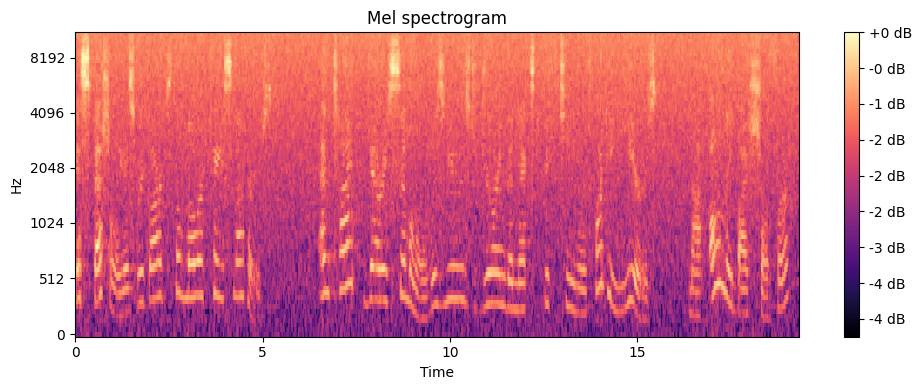

In [52]:
from datasets.preprocess import transform
from models.wavegrad_params import wavegrad_params
from models.params import params

import matplotlib.pyplot as plt
import numpy as np
import librosa.display

filename = "/Users/kostiks/Downloads/diffwave_final_distil_sh2/LJ001-0027.wav"
# Assuming mel_spectrogram is your mel spectrogram data as a NumPy array
# filename = "/Users/kostiks/study/cs/diffusion/progressive_distillation_audio/diffusion_distiller/diffwave_final_distil_sh/LJ001-0040.wav"
# filename = "/Users/kostiks/study/cs/diffusion/wavegrad_final/LJ001-0040.wav"

# and sr is the sample rate of your audio
mel_spectrogram = transform(filename, params) # Load your mel spectrogram data
sr = 22050  # Replace with your actual sample rate

# Convert to log scale (dB)
S_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.savefig('spec.png')
plt.show()

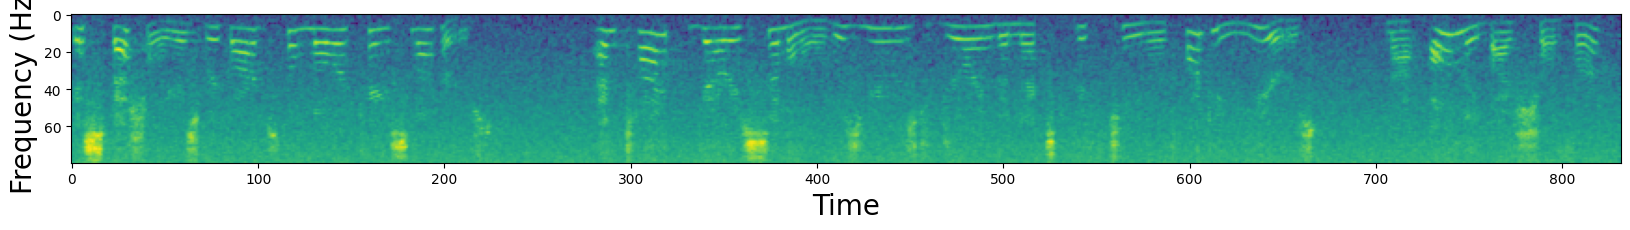

In [53]:
plt.figure(figsize=(20, 5))
plt.imshow(mel_spectrogram.squeeze())
plt.xlabel('Time', size=20)
plt.ylabel('Frequency (Hz)', size=20)
plt.show()

In [1]:
!pip3 install "qai-hub-models[facebook_denoiser]"

Defaulting to user installation because normal site-packages is not writeable
  Using cached qai_hub_models-0.5.1-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 54 kB 337 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 560 kB/s eta 0:00:01
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached numpy-1.23.1-cp39-cp39-macosx_11_0_arm64.whl (13.3 MB)
     |████████████████████████████████| 3.3 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 33.1 MB 2.9 MB/s eta 0:00:01
  Using cached protobuf-3.20.2-py2.py3-none-any.whl (162 kB)
     |████████████████████████████████| 76 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 28.7 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 5.3 MB/s eta 0:00:01
  Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
     |████████████████████████████████| 798 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.0 MB 751 kB/s eta 0:00

In [5]:
%run -m qai_hub_models.models.facebook_denoiser.demo
!python3 -m qai_hub_models.models.facebook_denoiser.demo


Wrote files:
tensor([[[-1.2128e-04,  9.4669e-06, -4.6796e-04,  ...,  2.8051e-04,
           4.4966e-04,  7.7471e-04]]])
/Users/kostiks/Library/Python/3.9/lib/python/site-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Wrote files:
tensor([[[-1.2128e-04,  9.4669e-06, -4.6796e-04,  ...,  2.8051e-04,
           4.4966e-04,  7.7471e-04]]])


In [6]:
!pip3 install noisereduce

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [12]:
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("/Users/kostiks/Downloads/diffwave_final_distil/LJ002-0278.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

In [ ]:
a = '/Users/kostiks/Downloads/diffwave_final_distil_sh2'

In [41]:
import glob
import os
import tqdm
noisy_data_dir = '/Users/kostiks/Downloads/output_wavegrad_distil_128/*'
files = glob.glob(noisy_data_dir)
output_dir = noisy_data_dir.split('/')[-2] + '_denoised'
os.makedirs(output_dir, exist_ok=True)
for i in tqdm.tqdm(files):
    rate, data = wavfile.read(i)
    reduced_noise = nr.reduce_noise(y=data, sr=rate)
    wavfile.write(output_dir + '/' + i.split('/')[-1], rate, reduced_noise)
    
mos = model.calculate_dir(output_dir, mean=True) # infer average MOS score across .wav files in directory
print(mos)

100%|██████████| 100/100 [00:33<00:00,  3.00it/s]


0.06756380777107551


In [33]:
output_dir + files[1].split('/')[-1]

'diffwave_final_distil_denoisedLJ013-0124.wav'

In [32]:
output_dir

'diffwave_final_distil_denoised'

In [2]:
v!pip3 install git+https://github.com/AndreevP/wvmos

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/AndreevP/wvmos to /private/var/folders/2w/1s7n38315rx8pkdpz8t33nj00000gn/T/pip-req-build-fgyagvv5
  Running command git clone -q https://github.com/AndreevP/wvmos /private/var/folders/2w/1s7n38315rx8pkdpz8t33nj00000gn/T/pip-req-build-fgyagvv5
  Resolved https://github.com/AndreevP/wvmos to commit 85ff6c41e6b03282ac0a7d8e84641b5893c95c3c
     |████████████████████████████████| 802 kB 103 kB/s eta 0:00:01
     |████████████████████████████████| 868 kB 79 kB/s eta 0:00:01
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Created wheel for wvmos: filename=wvmos-1.0-py3-none-any.whl size=2876 sha256=a011394a3b2928878f9a365d0516e9e65074e713b483bba9e062c76e4a0d18ad
  Stored in directory: /private/var/folders/2w/1s7n38315rx8pkdpz8t33nj00000gn/T/pip-ephem-wheel-cache-9wpkahlt/wheels/17/47/08/f3309d209e60011caf04b686c3f7a03744183feeb42c65573d
Successfully built wvmos
You should c

In [2]:
!pip install tensorfn

  Obtaining dependency information for tensorfn from https://files.pythonhosted.org/packages/a9/08/74da8f1967882689817b76877c54c6f65d84b1eed059b7360919b15ed05b/tensorfn-0.1.28-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for termcolor from https://files.pythonhosted.org/packages/d9/5f/8c716e47b3a50cbd7c146f45881e11d9414def768b7cd9c5e6650ec2a80a/termcolor-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for tabulate from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for markdown-it-py>=2.2.0 from https://file

# Model distillation